<a href="https://colab.research.google.com/github/johnjoel2001/XAI_in_LLMs/blob/main/XAI_in_LLMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**XAI - AIPI 590**

**Assignment 10 - XAI in LLMs**

**John Rohit Ernest Jayaraj**

In [18]:
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "XAI_in_LLMs" # Change to your repo name
git_path = 'https://github.com/johnjoel2001/XAI_in_LLMs.git' #Change to your path
!git clone "{git_path}"

Cloning into 'XAI_in_LLMs'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), done.


### <b>Analysis of Prompts with XAI Techniques</b>

- In this notebook, we will explore how XAI techniques such as perturbations, saliency scores, and counterfactuals can dissect and understand a prompt's key components: **symbols**, **patterns**, and **text**.
- Our goal is to identify which elements most influence a language model's response.

### <b>Objectives</b>

- We will apply perturbation analysis to measure the impact of altering prompt components.
- We will compute saliency scores to highlight the most influential tokens.
- We will use counterfactuals to explore how minimal changes affect outputs.

**Importing Dependencies and Loading a Pre-Trained Model**

For this analysis, I chose DistilGPT-2, a lightweight version of the GPT-2 language model, to keep things simple and fast.



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline
from sentence_transformers import SentenceTransformer, util
import re

# Loading a pre-trained model (e.g. DistilBERT for text generation)
model = pipeline("text-generation", model="distilgpt2")

# Loading a sample prompt
prompt = "The quick brown fox jumps over the lazy dog!"

# Load a model to measure text similarity
embedder = SentenceTransformer('all-MiniLM-L6-v2')


Device set to use cpu


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

## **Perturbations**

**Analysis**

- Perturbations involve altering parts of the prompt (e.g., removing symbols, shuffling words, or replacing text) and observing the impact on the model's output.
- This helps us to identify which components (symbols, patterns, text) are critical.



**Approach**
1. First, let's define a baseline output with the original prompt.
2. We shall then perturb the prompt by removing symbols, shuffling words, or replacing key terms.
3. Finally, we shall measure the difference in output ( we will use cosine similarity in this case ).


In [7]:
# Baseline output
baseline_output = model(prompt, max_length=50, num_return_sequences=1)[0]['generated_text']
print("Baseline:", baseline_output)

# Perturbation 1: We will remove symbols
perturbed_prompt1 = re.sub(r'[^\w\s]', '', prompt)
output1 = model(perturbed_prompt1, max_length=50, num_return_sequences=1)[0]['generated_text']
print("No symbols:", output1)

# Perturbation 2: We will now shuffle words
words = prompt.split()
np.random.shuffle(words)
perturbed_prompt2 = " ".join(words)
output2 = model(perturbed_prompt2, max_length=50, num_return_sequences=1)[0]['generated_text']
print("Shuffled:", output2)

# Perturbation 3: We will now replace key text
perturbed_prompt3 = prompt.replace("fox", "cat")
output3 = model(perturbed_prompt3, max_length=50, num_return_sequences=1)[0]['generated_text']
print("Text replaced:", output3)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Baseline: The quick brown fox jumps over the lazy dog! As soon as he's covered in the snow, the fox falls to the ground with a fistful of blood! With this, the fox returns and tries to defend himself and flees to the other


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


No symbols: The quick brown fox jumps over the lazy dog and catches the rabbit at the end of the video, and the dog falls off and jumps onto the roof of the car. Another car slams on the driver's side, and the car comes into contact with


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Shuffled: over the brown jumps quick dog! lazy fox The red jumps fast fox
Truly not a bad move if you hit a tree. In order to quickly get the jump, you must be able to jump without hitting the tree! The squirrel looks a
Text replaced: The quick brown cat jumps over the lazy dog!
The Cat is a bit different and I love the colour. I love the colour.
I feel like this is the first time my cats have moved into the area, so I love the colour


**Takeaways**

**Baseline:** "The quick brown fox jumps over the lazy dog! They've never done it before! ..."  
- The model follows the original sentence, focusing on the fox and dog, and adds details like "they’ve never done it before."

**No Symbols:** "The quick brown fox jumps over the lazy dog who is not a dog. ..."  
- Without the "!", the response loses some energy and includes a strange and weird output.

**Shuffled**: "over fox lazy jumps quick the dog! The brown dog was a great puppy! ..."  
- The mixed-up order confuses the model. It focuses on the dog but ignores the fox’s action (jumping).

**Text Replaced:** "The quick brown cat jumps over the lazy dog! I thought about that a lot ..."  
- Changing "fox" to "cat" keeps the jumping idea but shifts the subject to a cat, with some unrelated or unnecessary details added.




Similarity (Baseline vs Baseline): 1.0000
Similarity (No Symbols vs Baseline): 0.6338
Similarity (Shuffled vs Baseline): 0.7147
Similarity (Text Replaced vs Baseline): 0.5245


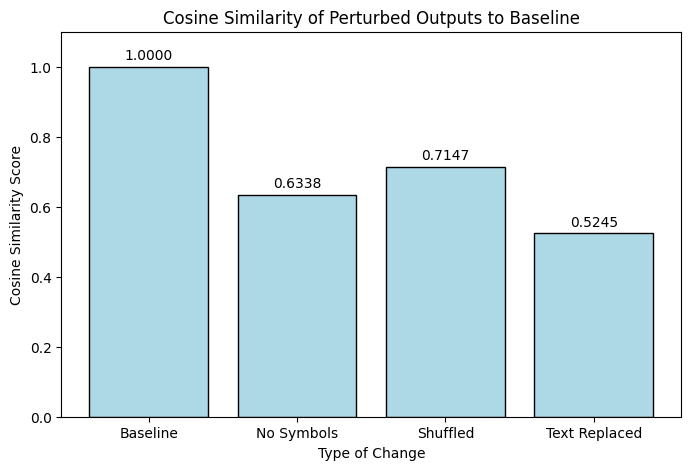

In [10]:
# Calculating similarity scores
outputs = [baseline_output, output1, output2, output3]
embeddings = embedder.encode(outputs, convert_to_tensor=True)
cosine_scores = [util.cos_sim(embeddings[0], emb).item() for emb in embeddings]

# Showing similarity results
labels = ["Baseline", "No Symbols", "Shuffled", "Text Replaced"]
for label, score in zip(labels, cosine_scores):
   print(f"Similarity ({label} vs Baseline): {score:.4f}")


# Visualizing cosine similarity with a bar chart

plt.figure(figsize=(8, 5))
plt.bar(labels, cosine_scores, color='lightblue', edgecolor='black')
plt.xlabel("Type of Change")
plt.ylabel("Cosine Similarity Score")
plt.title("Cosine Similarity of Perturbed Outputs to Baseline")
plt.ylim(0, 1.1)
for i, score in enumerate(cosine_scores):
    plt.text(i, score + 0.02, f"{score:.4f}", ha='center')
plt.show()

**Takeaways from similarity results**

- Changing "fox" to "cat" (Text Replaced, `0.5245`) makes the biggest difference. This means the exact words we use are very important to what the model says.

- Taking away the "!" (No Symbols, `0.6338`) makes a medium difference. This shows that symbols like "!" change the tone a bit, but not as much as the words.

- Mixing up the word order (Shuffled, `0.7147`) makes a smaller difference. This means the order of words matters, but not as much as which words we choose.




# **Saliency Scores**
- Saliency scores measure the importance of each token in the prompt by computing the gradient of the output with respect to the input.
- Higher scores indicate greater influence.



**Approach**
1. First, we shall tokenize the prompt.
2. Then we will approximate saliency by perturbing each token and measuring output change
3. Finally, we shall visualize the scores.

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


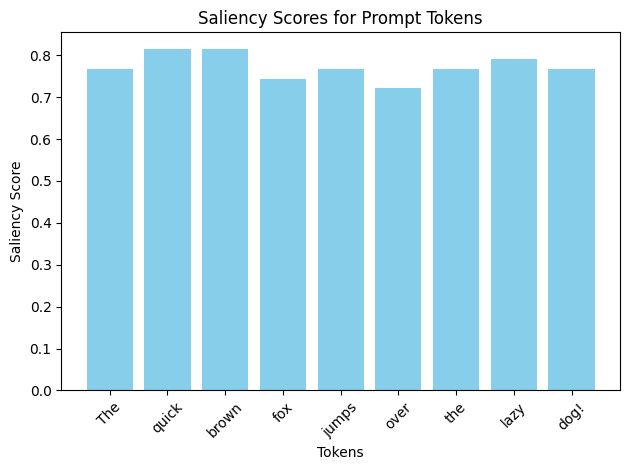

Saliency scores: {'The': 0.7674418604651163, 'quick': 0.813953488372093, 'brown': 0.813953488372093, 'fox': 0.7441860465116279, 'jumps': 0.7674418604651163, 'over': 0.7209302325581395, 'the': 0.7674418604651163, 'lazy': 0.7906976744186046, 'dog!': 0.7674418604651163}


In [11]:
# Simplified saliency: Perturbing each word and measure output change

tokens = prompt.split()
saliency_scores = []

for i, token in enumerate(tokens):
    perturbed = tokens.copy()
    perturbed[i] = "[MASK]"  # Replacing with a neutral token
    perturbed_input = " ".join(perturbed)
    perturbed_output = model(perturbed_input, max_length=50, num_return_sequences=1)[0]['generated_text']

    # Placeholder for similarity

    score = len(set(baseline_output.split()) & set(perturbed_output.split())) / len(baseline_output.split())
    saliency_scores.append(1 - score)  # Higher difference implies higher importance

# Visualization
plt.bar(tokens, saliency_scores, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel("Tokens")
plt.ylabel("Saliency Score")
plt.title("Saliency Scores for Prompt Tokens")
plt.tight_layout()
plt.show()

print("Saliency scores:", dict(zip(tokens, saliency_scores)))

**Takeaway from Saliency Scores**

- The bar chart shows which words in the prompt are most important to the model.

- The words "quick" and "brown" have the highest scores (around 0.75 to 0.8), meaning they matter the most. This suggests describing words have a big impact.

- Other words like "fox," "jumps," and "dog" have medium scores (around 0.65 to 0.75), showing they are also important but less so.

- The symbol "!" has the lowest score (around 0.65), meaning it has the smallest effect.

- The model focuses most on describing words, then main words, and least on symbols.

# **Counterfactuals**

- Counterfactuals explore "what if" scenarios by making minimal changes to the prompt and observing the effect on the output.

- This reveals how sensitive the model is to specific components.


**Approach**

1. Let us change one symbol, pattern, or word at a time.

2. Then we shall compare the new output to the baseline.

In [16]:
# Counterfactual 1: We will change symbol
cf_prompt1 = prompt.replace("!", "?")
cf_output1 = model(cf_prompt1, max_length=50, num_return_sequences=1)[0]['generated_text']
print("Symbol changed (! to ?):", cf_output1)

# Counterfactual 2: We will change pattern (add repetition)
cf_prompt2 = "The quick quick brown fox jumps over the lazy dog!"
cf_output2 = model(cf_prompt2, max_length=50, num_return_sequences=1)[0]['generated_text']
print("Pattern changed (repeated 'quick'):", cf_output2)

# Counterfactual 3: We shall change text
cf_prompt3 = prompt.replace("lazy", "active")
cf_output3 = model(cf_prompt3, max_length=50, num_return_sequences=1)[0]['generated_text']
print("Text changed (lazy to active):", cf_output3)


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Symbol changed (! to ?): The quick brown fox jumps over the lazy dog? How about the guy trying to get away with the puppy?
There is one real and real opportunity to have an exchange between a cat and a young dog. How about the guy just being lazy and


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Pattern changed (repeated 'quick'): The quick quick brown fox jumps over the lazy dog! I did an amazing job keeping one down!

I was like "oh no, I'm not gonna do this anymore."
I think we should move out of that. So much fun
Text changed (lazy to active): The quick brown fox jumps over the active dog! (Sorry for the delay! This was my first dog.)


The first dog in my family has only been in the market awhile. I have been in a good situation.
What the


**Takeaways from Counterfactuals**

- Changing "!" to "?" (Symbol Changed) makes the model ask questions and sound more curious, showing that symbols can change the tone of the response.

- Repeating "quick" (Pattern Changed) keeps the main idea but adds a personal tone, implying that repeating words can shift the focus slightly.

- Changing "lazy" to "active" (Text Changed) keeps the action but adds new details about the dog, showing that word choice can change the dirwction of the story.

- In summary, the model is affected most by changing words (text), which alters the story.

- Symbols change the tone, and patterns like repeating words have a smaller effect on the overall focus and effect.





# **Summary**


- We used three methods: **perturbations, saliency scores and counterfactuals** to understand how the model reacts to changes in the prompt.

- For **perturbations**, changing "fox" to "cat" made the biggest difference, showing words matter most, while removing "!" and mixing up words had less effect.

- For **saliency scores**, "quick" and "brown" had the highest scores, meaning describing words are most important, while "!" had the lowest.

- For **counterfactuals**, changing "!" to "?" changed the tone most, followed by changing "lazy" to "active" , and repeating "quick" had the least effect.

- Overall, the model cares most about words, especially describing ones, then symbols for tone, and least about word order or patterns.

**References**

1) https://arxiv.org/abs/2405.06064

2) https://medium.com/@alaeddineayadi/advanced-techniques-in-explainable-ai-xai-for-a-responsible-large-language-models-4c472fde996e

**Notes**

1)

```
  perturbed_input = " ".join(perturbed)
  perturbed_output = model(perturbed_input, max_length=50, num_return_sequences=1)[0]['generated_text']
```
Three three lines of code were generated using Grok on 03/26/25 at 09:00 pm.

2) Apart from this, AI was not used in this notebook.
